In [2]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
import os
print(os.listdir("."))

Using TensorFlow backend.


['.git', '.gitignore', '.ipynb_checkpoints', 'Data', 'Dir', 'faces.py', 'folder.py', 'getting_emoji_data.py', 'Human_data', 'LICENSE', 'Models', 'Notebook.ipynb', 'README.md', 'requirements.txt', 'Working_data', 'x']


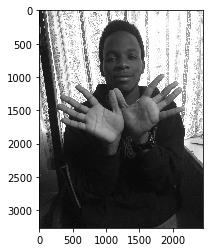

In [63]:
main_dir = "."
train_dir = "Human_data"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    new= os.path.join(path, p)
    for img in os.listdir(new):
        img_array = cv2.imread(os.path.join(new, img), cv2.IMREAD_GRAYSCALE)
        #new_img_array = cv2.resize(img_array, dsize=(80, 80))
        plt.imshow(img_array, cmap="gray")
        break

In [64]:
X = []
y = []
def create_test_data(path):
    for p in os.listdir(path):
        new= os.path.join(path, p)
        category = p
        for img in os.listdir(new):
            img_array = cv2.imread(os.path.join(new, img), cv2.IMREAD_GRAYSCALE)
            #new_img_array = cv2.resize(img_array, dsize=(80, 80))
            X.append(img_array)
            y.append(category)

In [65]:
img_array.shape

(3264, 2448)

In [66]:
create_test_data(path)
X = np.array(X)
y = np.array(y)

In [68]:
model = Sequential()
model.add(Conv2D(20,(3,3), activation="relu", input_shape=(3264, 2448, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(20,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(20,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0521 09:58:42.584460  6436 deprecation.py:506] From C:\Users\0x6f736f646f\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:3368: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
